This script is to test the signal change in wet versus dry days in 2025.

In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

In [2]:
#setting time intervals
startday = start=pd.to_datetime('01-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=365, freq='D', closed='left')
timeintervals

IntervalIndex([[2025-01-01 00:00:00, 2025-01-02 00:00:00),
               [2025-01-02 00:00:00, 2025-01-03 00:00:00),
               [2025-01-03 00:00:00, 2025-01-04 00:00:00),
               [2025-01-04 00:00:00, 2025-01-05 00:00:00),
               [2025-01-05 00:00:00, 2025-01-06 00:00:00),
               [2025-01-06 00:00:00, 2025-01-07 00:00:00),
               [2025-01-07 00:00:00, 2025-01-08 00:00:00),
               [2025-01-08 00:00:00, 2025-01-09 00:00:00),
               [2025-01-09 00:00:00, 2025-01-10 00:00:00),
               [2025-01-10 00:00:00, 2025-01-11 00:00:00),
               ...
               [2025-12-22 00:00:00, 2025-12-23 00:00:00),
               [2025-12-23 00:00:00, 2025-12-24 00:00:00),
               [2025-12-24 00:00:00, 2025-12-25 00:00:00),
               [2025-12-25 00:00:00, 2025-12-26 00:00:00),
               [2025-12-26 00:00:00, 2025-12-27 00:00:00),
               [2025-12-27 00:00:00, 2025-12-28 00:00:00),
               [2025-12-28 00:00:00, 

In [3]:
#loading csvs
# path
base_path = '/Volumes/coraldelmar/all_data/'

# Read all CSVs
vod_anom12 = pd.read_csv(base_path + 'vod_anom12.csv')
vod_anom13 = pd.read_csv(base_path + 'vod_anom13.csv')
vod_anom17 = pd.read_csv(base_path + 'vod_anom17.csv')
vod_anom57 = pd.read_csv(base_path + 'vod_anom57.csv')
#
ts12 = pd.read_csv(base_path + 'vod_ts_macrocosm12.csv')
ts13 = pd.read_csv(base_path + 'vod_ts_macrocosm13.csv')
ts17 = pd.read_csv(base_path + 'vod_ts_macrocosm17.csv')
ts57 = pd.read_csv(base_path + 'vod_ts_macrocosm57.csv')

#
more12 = pd.read_csv(base_path + 'vod_moreveg12.csv')
less12 = pd.read_csv(base_path + 'vod_lessveg12.csv')
more13 = pd.read_csv(base_path + 'vod_moreveg13.csv')
less13 = pd.read_csv(base_path + 'vod_lessveg13.csv')
more17 = pd.read_csv(base_path + 'vod_moreveg17.csv')
less17 = pd.read_csv(base_path + 'vod_lessveg17.csv')
more57 = pd.read_csv(base_path + 'vod_moreveg57.csv')
less57 = pd.read_csv(base_path + 'vod_lessveg57.csv')

In [4]:
# Set Times New Roman globally
plt.rcParams["font.family"] = "Times New Roman"

# loading precipitation data
precip_df = pd.read_excel("/Volumes/coraldelmar/weather.station_alonso/2025/precip05.xlsx")

#
precip_df['Timestamp'] = pd.to_datetime(precip_df['Timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)

#hourly&grouping by hour
precip_df['hour'] = precip_df['Timestamp'].dt.hour
precip_hourly = precip_df.groupby('hour')['Rain_mm_Tot'].sum()
precip_hourly = precip_hourly.reindex(range(24), fill_value=0)  # ensure 0–23 coverage


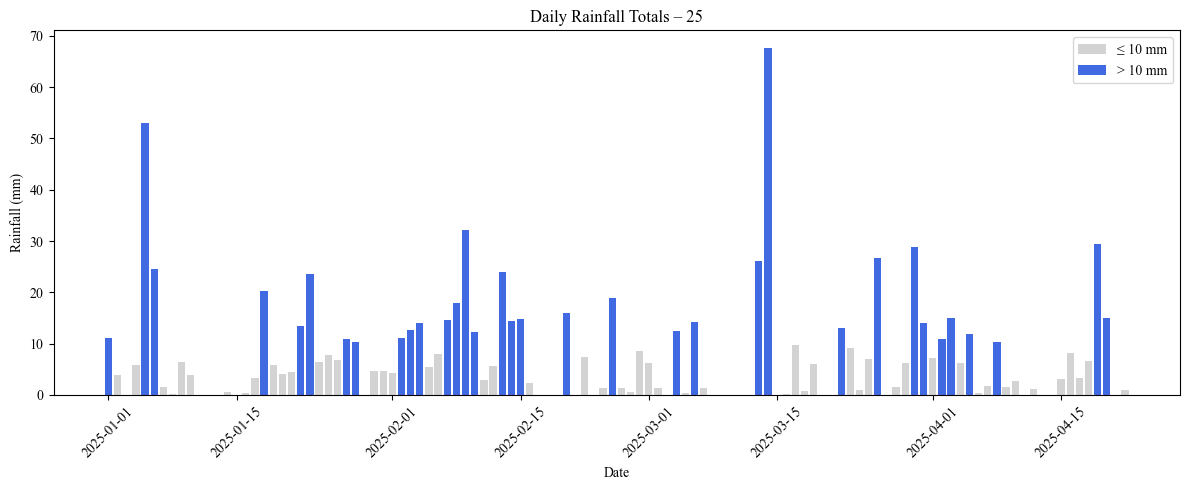

In [5]:
# Parse datetime
precip_df['Timestamp'] = pd.to_datetime(precip_df['Timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Extract date
precip_df['Date'] = precip_df['Timestamp'].dt.date

# group by date
precip_daily = precip_df.groupby('Date')['Rain_mm_Tot'].sum().reset_index()

# wet/dry
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 10]
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 10]

#
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(dry_days['Date'], dry_days['Rain_mm_Tot'], color='lightgray', label='≤ 10 mm')
ax.bar(wet_days['Date'], wet_days['Rain_mm_Tot'], color='royalblue', label='> 10 mm')
ax.set_title("Daily Rainfall Totals – 25")
ax.set_xlabel("Date")
ax.set_ylabel("Rainfall (mm)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/4070044688.py:16: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts13.loc[ts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/4070044688.py:17: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts13.loc[ts13['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/4070044688.py:21: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future versi

Example VOD dates: <DatetimeArray>
['2025-04-14 00:00:00', '2025-04-15 00:00:00', '2025-04-16 00:00:00',
 '2025-04-17 00:00:00', '2025-04-18 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet day matches: 96
Dry day matches: 102
wetdry
none    994
dry     102
wet      96
Name: count, dtype: int64


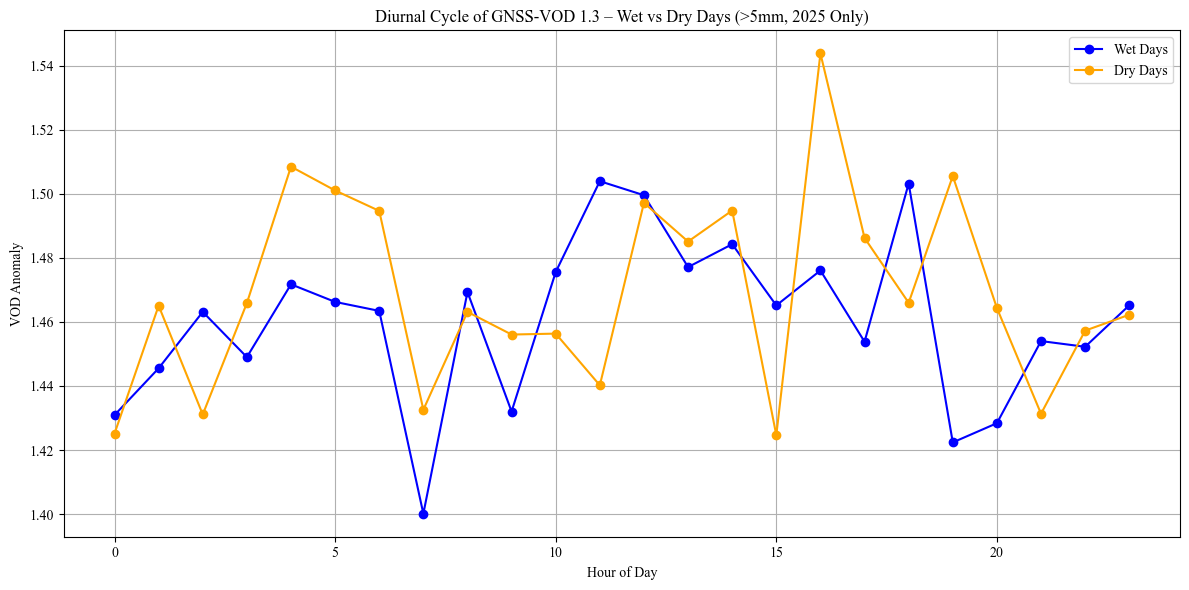

In [6]:
#5mm
#  wet/dry 
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']

#
ts13['Epoch'] = pd.to_datetime(ts13['Epoch'])  # Ensure Epoch is datetime
ts13.set_index('Epoch', inplace=True)
ts13['Date'] = ts13.index.normalize()

# ensuring only 2025
ts13 = ts13[ts13['Date'].dt.year == 2025]

#  wet/dry 
ts13['wetdry'] = 'none'
ts13.loc[ts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
ts13.loc[ts13['Date'].isin(dry_days), 'wetdry'] = 'dry'

#  checks
print("Example VOD dates:", ts13['Date'].unique()[:5])
print("Wet day matches:", ts13['Date'].isin(wet_days).sum())
print("Dry day matches:", ts13['Date'].isin(dry_days).sum())
print(ts13['wetdry'].value_counts())

# 
wet_data = ts13[ts13['wetdry'] == 'wet']
dry_data = ts13[ts13['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.3 – Wet vs Dry Days (>5mm, 2025 Only)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Example VOD dates: <DatetimeArray>
['2025-04-14 00:00:00', '2025-04-15 00:00:00', '2025-04-16 00:00:00',
 '2025-04-17 00:00:00', '2025-04-18 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet day matches: 48
Dry day matches: 150
wetdry
none    994
dry     150
wet      48
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/818626142.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts13.loc[ts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/818626142.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts13.loc[ts13['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/818626142.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, t

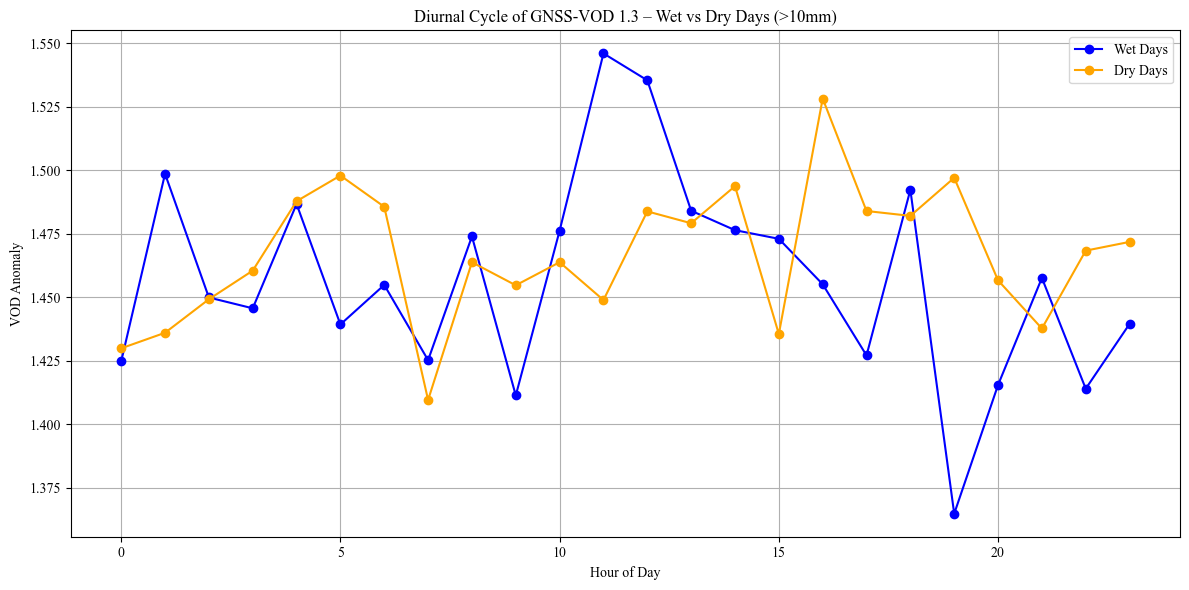

In [7]:
#10mm
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 10]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 10]['Date']

#  wet/dry 
ts13['wetdry'] = 'none'
ts13.loc[ts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
ts13.loc[ts13['Date'].isin(dry_days), 'wetdry'] = 'dry'

#  checks
print("Example VOD dates:", ts13['Date'].unique()[:5])
print("Wet day matches:", ts13['Date'].isin(wet_days).sum())
print("Dry day matches:", ts13['Date'].isin(dry_days).sum())
print(ts13['wetdry'].value_counts())

# 
wet_data = ts13[ts13['wetdry'] == 'wet']
dry_data = ts13[ts13['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()
#
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))

wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.3 – Wet vs Dry Days (>10mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


In [8]:
morets13 = pd.read_csv(base_path + 'vod_moretsveg13.csv')
print(morets13.columns)

Index(['Epoch', 'VOD1', 'VOD2', 'Azimuth', 'Elevation', 'CellID', 'VOD1_mean',
       'VOD1_std', 'VOD1_count', 'VOD2_mean', 'VOD2_std', 'VOD2_count',
       'Azimuth_mean', 'Azimuth_std', 'Azimuth_count', 'Elevation_mean',
       'Elevation_std', 'Elevation_count', 'VOD1_anom', 'VOD2_anom'],
      dtype='object')


In [9]:
morets13.head()

,Epoch,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
0,2025-04-15 01:00:00,1.650463,1.484798,20.540000,38.086957,2518.939130,1.641894,0.509162,266.630435,1.513668,0.522799,266.630435,20.582067,0.586924,266.630435,38.133474,0.498766,266.630435,1.486063,1.280915
1,2025-04-15 13:00:00,1.651549,1.377550,24.833613,42.671849,2108.525210,1.621402,0.550206,277.075630,1.436120,0.532923,277.075630,24.829088,0.587270,277.075630,42.703577,0.523916,277.075630,1.507640,1.251214
2,2025-04-15 17:00:00,1.555510,1.259757,24.796014,35.525725,2744.079710,1.457036,0.487730,208.652174,1.227288,0.465125,208.652174,24.777899,0.554382,208.652174,35.430296,0.481571,208.652174,1.575967,1.342254
3,2025-04-16 01:00:00,1.599821,1.450644,20.502553,38.751064,2491.182979,1.600625,0.499468,276.817021,1.506275,0.532120,276.817021,20.544757,0.612151,276.817021,38.728646,0.498470,276.817021,1.476690,1.254154
4,2025-04-16 07:00:00,1.546145,1.433381,18.402789,36.791633,2579.067729,1.655391,0.519918,290.219124,1.474535,0.541006,290.219124,18.401358,0.552011,290.219124,36.719373,0.477352,290.219124,1.368248,1.268631


Example VOD dates: <DatetimeArray>
['2025-04-15 00:00:00', '2025-04-16 00:00:00', '2025-04-17 00:00:00',
 '2025-04-18 00:00:00', '2025-04-19 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 14
Dry matches: 14
wetdry
none    42
dry     14
wet     14
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/964026244.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets13.loc[morets13['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/964026244.py:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets13.loc[morets13['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/964026244.py:18: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a

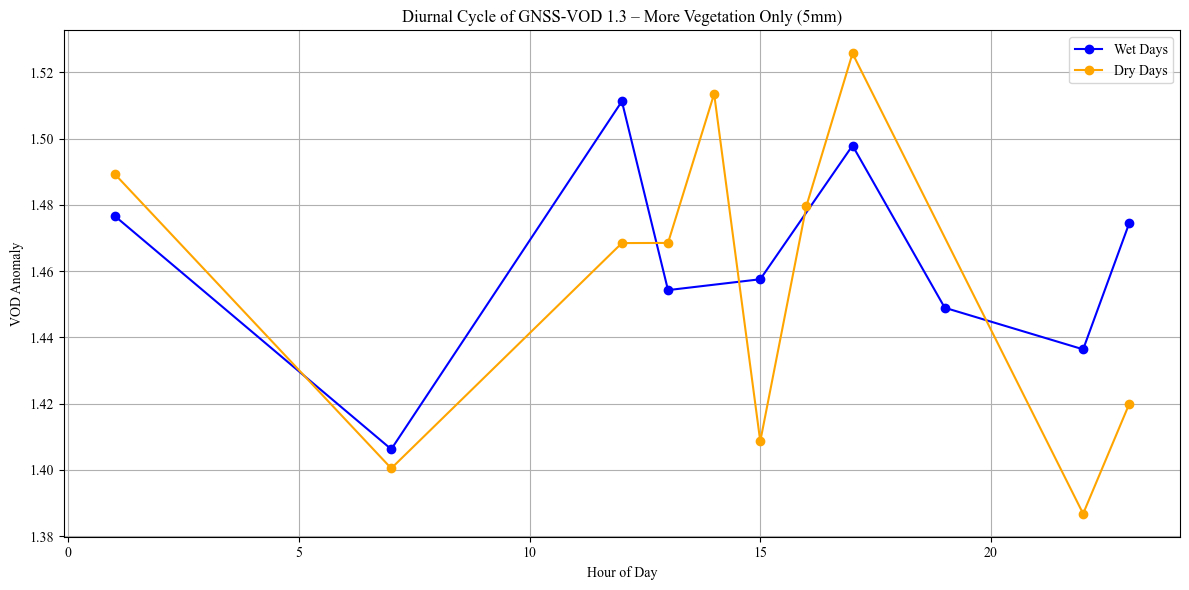

In [10]:
#5mm

wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']

# 
morets13['Epoch'] = pd.to_datetime(morets13['Epoch'])
morets13.set_index('Epoch', inplace=True)
morets13['Date'] = morets13.index.normalize()

#  wet/dry 
morets13['wetdry'] = 'none'
morets13.loc[morets13['Date'].isin(wet_days), 'wetdry'] = 'wet'
morets13.loc[morets13['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", morets13['Date'].unique()[:5])
print("Wet matches:", morets13['Date'].isin(wet_days).sum())
print("Dry matches:", morets13['Date'].isin(dry_days).sum())
print(morets13['wetdry'].value_counts())

#
wet_data = morets13[morets13['wetdry'] == 'wet']
dry_data = morets13[morets13['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.3 – More Vegetation Only (5mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/1471206991.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets13.loc[morets13['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/1471206991.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets13.loc[morets13['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/1471206991.py:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In

Example VOD dates: <DatetimeArray>
['2025-04-15 00:00:00', '2025-04-16 00:00:00', '2025-04-17 00:00:00',
 '2025-04-18 00:00:00', '2025-04-19 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 6
Dry matches: 22
wetdry
none    42
dry     22
wet      6
Name: count, dtype: int64


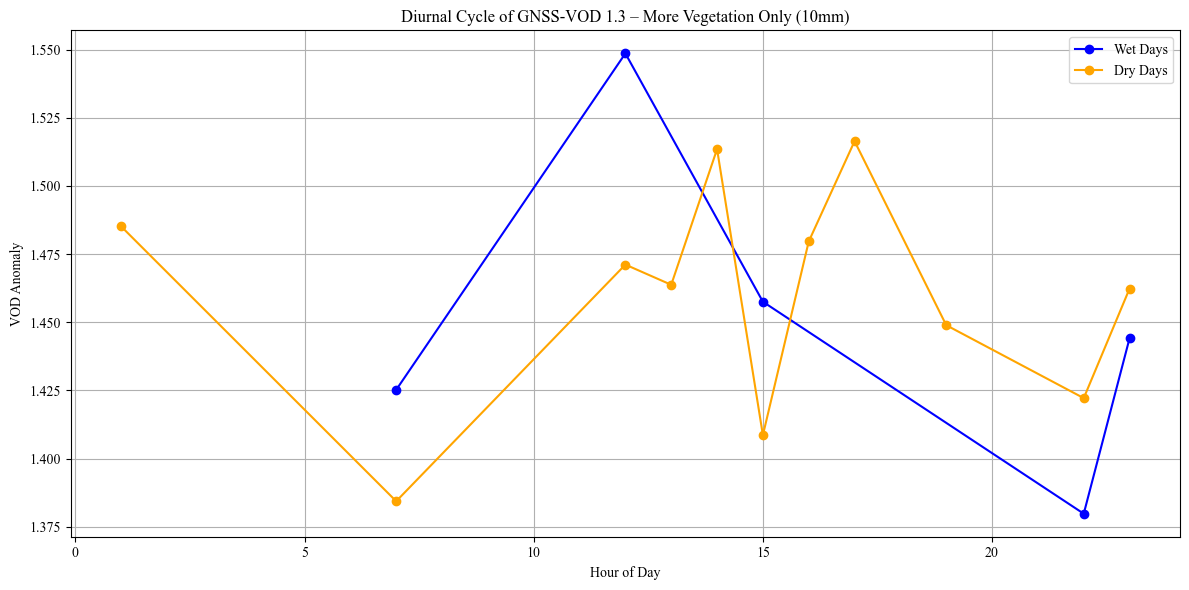

In [11]:

#10mm

wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 10]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 10]['Date']


#  wet/dry 
morets13['wetdry'] = 'none'
morets13.loc[morets13['Date'].isin(wet_days), 'wetdry'] = 'wet'
morets13.loc[morets13['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", morets13['Date'].unique()[:5])
print("Wet matches:", morets13['Date'].isin(wet_days).sum())
print("Dry matches:", morets13['Date'].isin(dry_days).sum())
print(morets13['wetdry'].value_counts())

# 
wet_data = morets13[morets13['wetdry'] == 'wet']
dry_data = morets13[morets13['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.3 – More Vegetation Only (10mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [12]:
lessts13= pd.read_csv(base_path + 'vod_lesstsveg13.csv')

Example VOD dates: <DatetimeArray>
['2025-04-14 00:00:00', '2025-04-15 00:00:00', '2025-04-16 00:00:00',
 '2025-04-17 00:00:00', '2025-04-18 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 82
Dry matches: 66
wetdry
none    135
wet      82
dry      66
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/314730002.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts13.loc[lessts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/314730002.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts13.loc[lessts13['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/314730002.py:17: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a

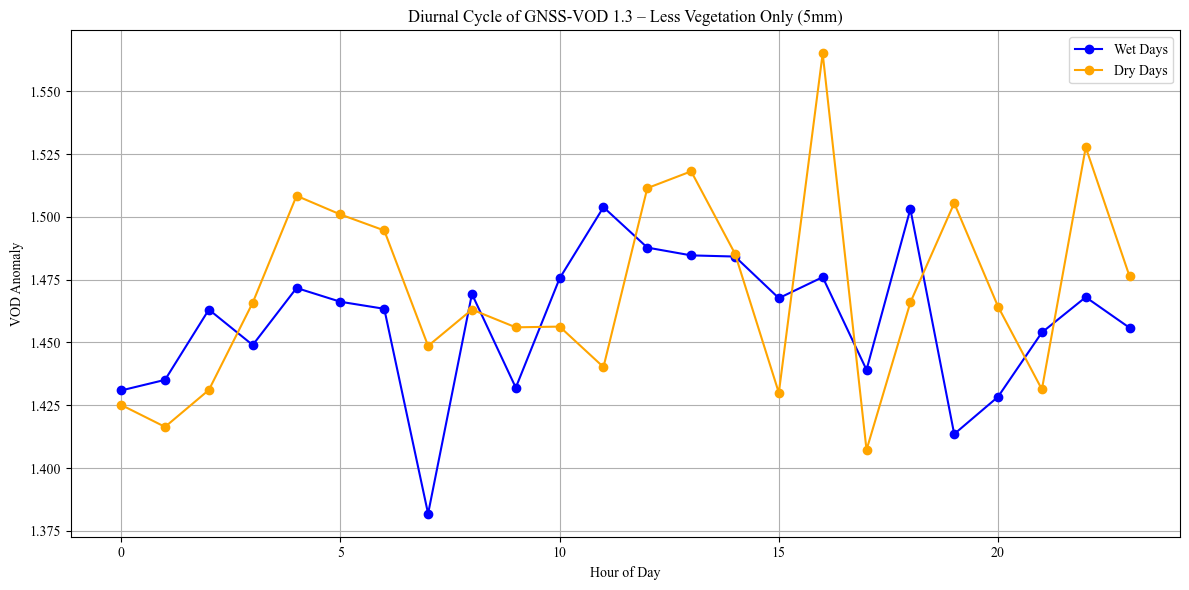

In [13]:
#5mm

wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']
# --- 2. Prepare VOD Data (ts12) ---
lessts13['Epoch'] = pd.to_datetime(lessts13['Epoch'])  
lessts13.set_index('Epoch', inplace=True)
lessts13['Date'] = lessts13.index.normalize()

#  wet/dry 
lessts13['wetdry'] = 'none'
lessts13.loc[lessts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
lessts13.loc[lessts13['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", lessts13['Date'].unique()[:5])
print("Wet matches:", lessts13['Date'].isin(wet_days).sum())
print("Dry matches:", lessts13['Date'].isin(dry_days).sum())
print(lessts13['wetdry'].value_counts())

#
wet_data = lessts13[lessts13['wetdry'] == 'wet']
dry_data = lessts13[lessts13['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

#
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.3 – Less Vegetation Only (5mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/3613962528.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts13.loc[lessts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/3613962528.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts13.loc[lessts13['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_18477/3613962528.py:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In

Example VOD dates: <DatetimeArray>
['2025-04-14 00:00:00', '2025-04-15 00:00:00', '2025-04-16 00:00:00',
 '2025-04-17 00:00:00', '2025-04-18 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 42
Dry matches: 106
wetdry
none    135
dry     106
wet      42
Name: count, dtype: int64


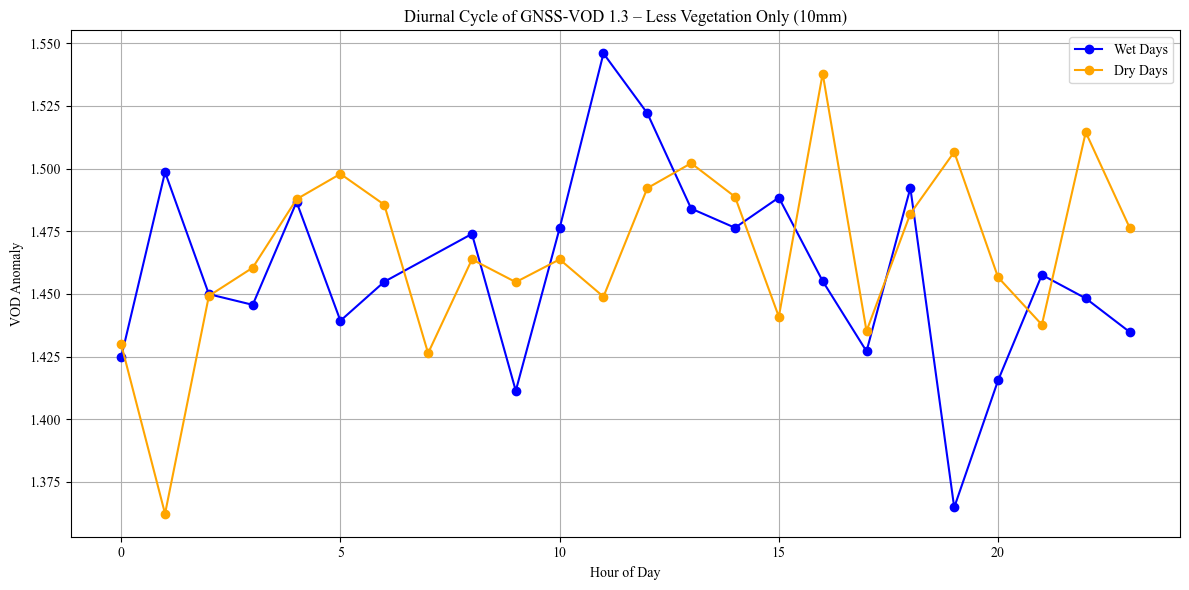

In [14]:
#10mm

wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 10]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 10]['Date']
# --- 2. Prepare VOD Data (ts12) ---

#  wet/dry 
lessts13['wetdry'] = 'none'
lessts13.loc[lessts13['Date'].isin(wet_days), 'wetdry'] = 'wet'
lessts13.loc[lessts13['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", lessts13['Date'].unique()[:5])
print("Wet matches:", lessts13['Date'].isin(wet_days).sum())
print("Dry matches:", lessts13['Date'].isin(dry_days).sum())
print(lessts13['wetdry'].value_counts())

# 
wet_data = lessts13[lessts13['wetdry'] == 'wet']
dry_data = lessts13[lessts13['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

#
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.3 – Less Vegetation Only (10mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
